# **Bitcoin Price Prediction**

#Importing Libraries

In [23]:
import io, os, sys, setuptools, tokenize

In [24]:
!pip install prophet
import prophet

In [25]:
import pandas as pd

#Reading Dataset

In [30]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2023-01-22  22720.416016
1    2023-01-23  22934.431641
2    2023-01-24  22636.468750
3    2023-01-25  23117.859375
4    2023-01-26  23032.777344
..          ...           ...
361  2024-01-18  41262.058594
362  2024-01-19  41618.406250
363  2024-01-20  41665.585938
364  2024-01-21  41545.785156
365  2024-01-22  40660.058594

[366 rows x 2 columns]


# Fit data into model

In [36]:
import prophet

prophet = prophet.Prophet()
prophet.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgznsanvn/joa15b8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgznsanvn/tfjlcinp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=240', 'data', 'file=/tmp/tmpgznsanvn/joa15b8f.json', 'init=/tmp/tmpgznsanvn/tfjlcinp.json', 'output', 'file=/tmp/tmpgznsanvn/prophet_modelws9vlab3/prophet_model-20240122111100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Predictions

In [37]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2023-01-22
1   2023-01-23
2   2023-01-24
3   2023-01-25
4   2023-01-26
..         ...
726 2025-01-17
727 2025-01-18
728 2025-01-19
729 2025-01-20
730 2025-01-21

[731 rows x 1 columns]


In [47]:
forecast = prophet.predict(future)#yhat is a predicted value
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2024-07-06,70457.158463,60593.302913,80056.786046
532,2024-07-07,70627.894362,60548.522872,80682.295162
533,2024-07-08,70816.135300,60931.994922,80832.899086
534,2024-07-09,71218.153824,61584.179485,80918.039662
535,2024-07-10,71396.526328,61221.969479,81859.645299
...,...,...,...,...
726,2025-01-17,99052.509784,68110.606380,128562.568062
727,2025-01-18,99137.520163,69939.328845,128578.907317
728,2025-01-19,99308.256061,69365.639350,128826.285205
729,2025-01-20,99496.497000,69466.696767,128857.635337


#Plot

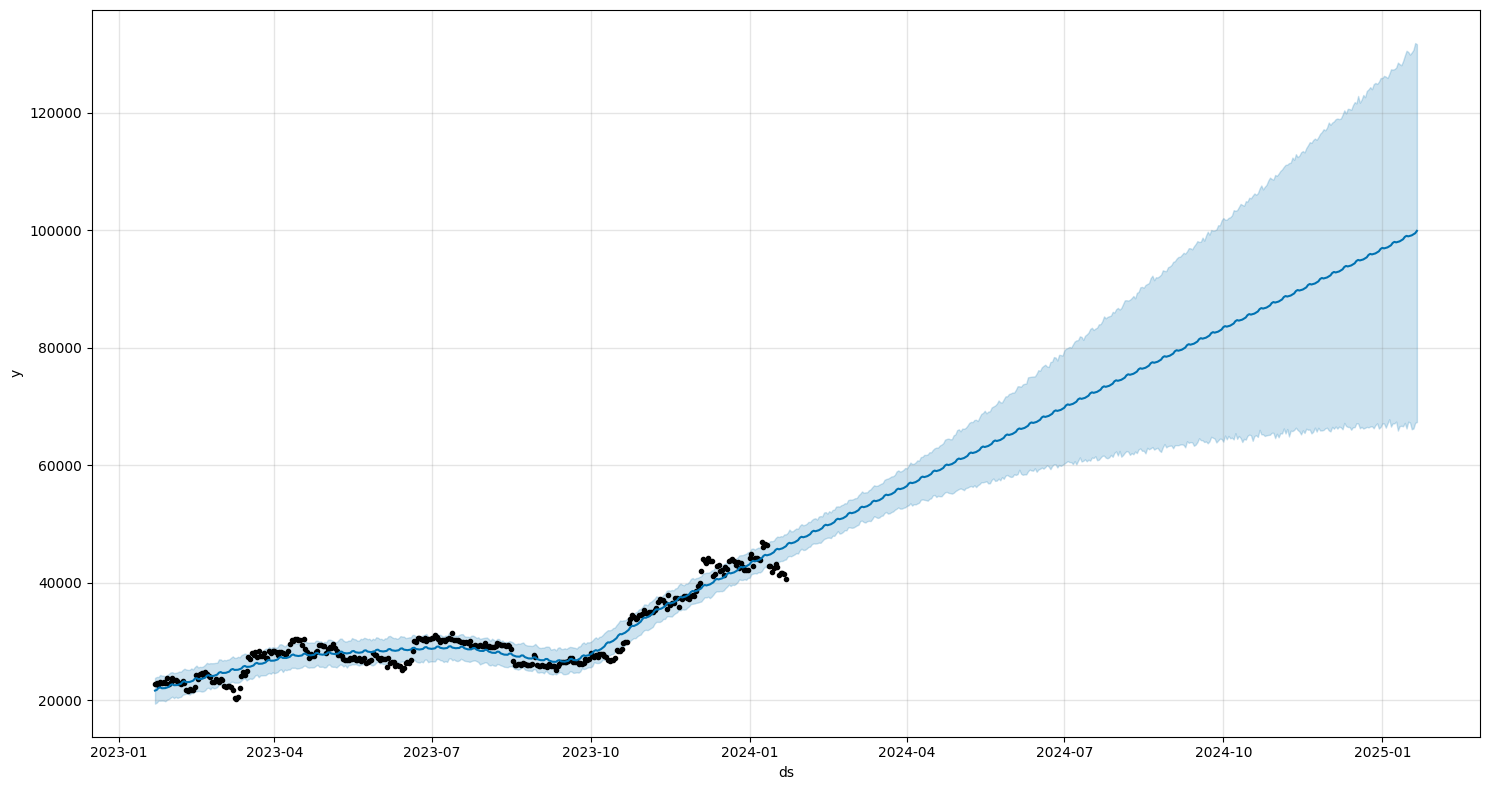

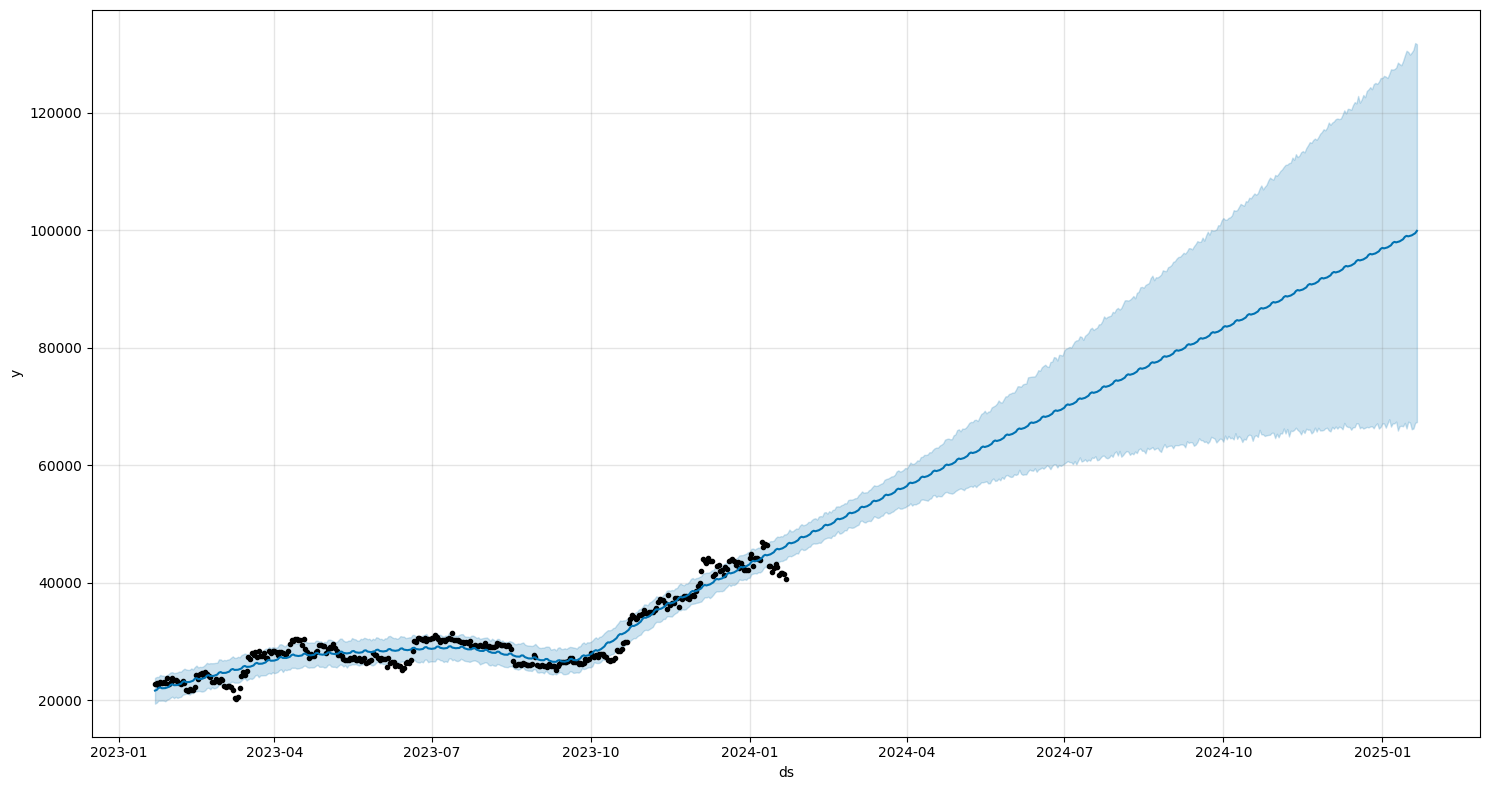

In [45]:
from prophet.plot import plot
prophet.plot(forecast, figsize=(15, 8))